# 🌲 Permanent Crop Land Cover Analysis - EuroSAT Multispectral Dataset

## Overview
This notebook provides comprehensive analysis of Permanent Crop class satellite imagery from the EuroSAT multispectral dataset. We'll explore spectral signatures, vegetation indices, and Permanent Crop characteristics using Sentinel-2 data.

## What You'll Learn:
- ✅ Dataset validation and structure exploration
- ✅ Dataset balancing to a uniform size (if needed)
- 📊 Multispectral band analysis and statistics
- 🌿 Vegetation index calculations (NDVI, EVI, SAVI)
- 🎨 RGB and false-color composite visualization
- 📈 Crop health and density assessment
- 🔍 Comparative analysis across Permanent Crop patches


---

## 🔧 Step 1: Dataset Setup and Validation

### What this cell does:
- **📁 Path Configuration**: Sets up the correct path to your EuroSAT dataset
- **✅ Data Validation**: Checks if all folders and files exist
- **📊 Dataset Overview**: Counts files per class and displays structure
- **🛡️ Error Prevention**: Stops execution early if paths are wrong

### Key Outputs:
- Confirmation that dataset is found and accessible
- List of all land cover classes available
- File count per class for data balance assessment
- Sample Permanent Crop file names for verification

🚀 Starting PermanentCrop Analysis at 2025-09-19 00:21:16
✅ Dataset found: T:\DEPI final Project\EuroSAT_MS
✅ Found 10 land cover classes: AnnualCrop, Forest, HerbaceousVegetation, Highway, Industrial, Pasture, PermanentCrop, Residential, River, SeaLake
✅ PermanentCrop class folder verified: T:\DEPI final Project\EuroSAT_MS\PermanentCrop

📊 Dataset Composition (files per class):
  ✅ AnnualCrop      : 2,000 images
  ✅ Forest          : 2,000 images
  ✅ HerbaceousVegetation : 2,000 images
  ✅ Highway         : 2,000 images
  ✅ Industrial      : 2,000 images
  ✅ Pasture         : 2,000 images
  ✅ PermanentCrop   : 2,000 images
  ✅ Residential     : 2,000 images
  ✅ River           : 2,000 images
  ✅ SeaLake         : 2,000 images

🌲 PermanentCrop Dataset Summary:
   📁 Total PermanentCrop images: 2,000
   📄 Sample filenames:
      1. PermanentCrop_1.tif
      2. PermanentCrop_10.tif
      3. PermanentCrop_1000.tif
      4. PermanentCrop_1001.tif
      5. PermanentCrop_1002.tif
      ... and

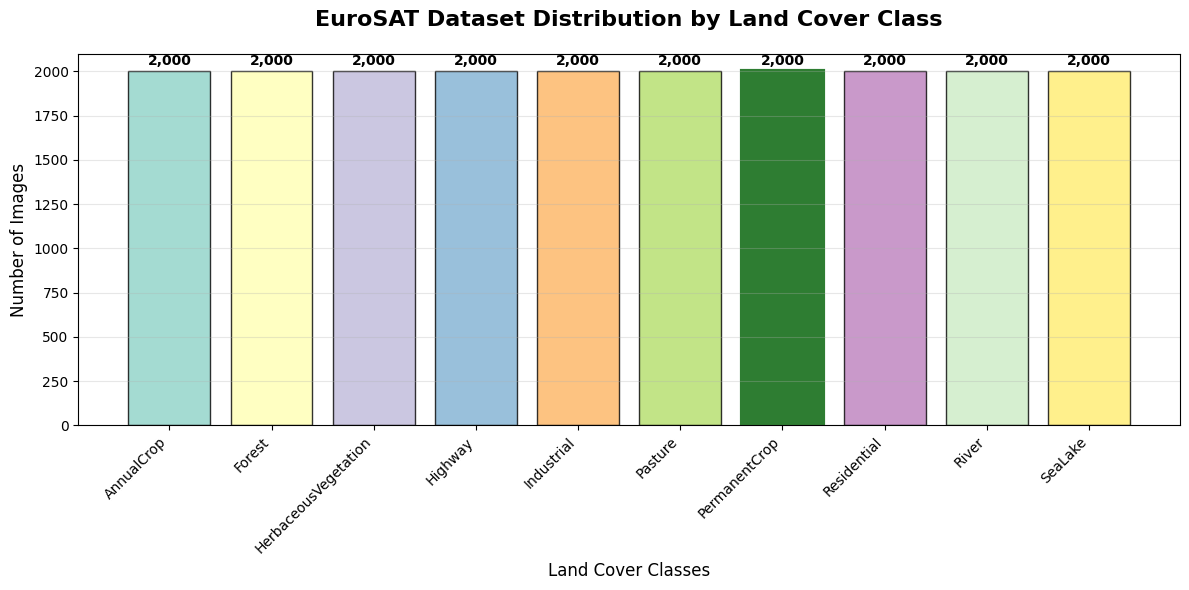


✨ Setup completed successfully! Ready to analyze 2,000 PermanentCrop images.


In [18]:
# ====== STEP 1: Dataset Setup and Validation ======
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('default')
sns.set_palette("husl")

# --- Path and Class Configuration ---
# IMPORTANT: Update DATA_DIR with the correct path to your EuroSAT_MS folder
DATA_DIR = Path(r"T:\DEPI final Project\EuroSAT_MS")
CLASS_NAME = "PermanentCrop"

print(f"🚀 Starting PermanentCrop Analysis at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

# --- Dataset Validation ---
if not DATA_DIR.exists():
    raise FileNotFoundError(f"❌ ERROR: Dataset folder not found at: {DATA_DIR}\n"
                        f"Please update DATA_DIR with the correct path to your EuroSAT_MS folder.")
print(f"✅ Dataset found: {DATA_DIR}")

classes = sorted([p.name for p in DATA_DIR.iterdir() if p.is_dir()])
if len(classes) == 0:
    raise FileNotFoundError(f"❌ ERROR: No class folders found inside: {DATA_DIR}\n"
                        f"Expected folders like 'PermanentCrop', 'PermanentCrop', etc.")
print(f"✅ Found {len(classes)} land cover classes: {', '.join(classes)}")

PermanentCrop_dir = DATA_DIR / CLASS_NAME
if not PermanentCrop_dir.exists():
    raise FileNotFoundError(f"❌ ERROR: '{CLASS_NAME}' folder not found at: {PermanentCrop_dir}")
print(f"✅ PermanentCrop class folder verified: {PermanentCrop_dir}")

# --- Dataset Overview ---
print("\n📊 Dataset Composition (files per class):")
counts = {}
for c in classes:
    count = len(list((DATA_DIR / c).glob("*.tif")))
    counts[c] = count
    status = "✅" if count > 0 else "⚠️"
    print(f"  {status} {c:<15} : {count:,} images")

PermanentCrop_tifs = sorted(PermanentCrop_dir.glob("*.tif"))
if len(PermanentCrop_tifs) == 0:
    raise FileNotFoundError(f"❌ ERROR: No .tif files found in {PermanentCrop_dir}")
print(f"\n🌲 PermanentCrop Dataset Summary:")
print(f"   📁 Total PermanentCrop images: {len(PermanentCrop_tifs):,}")
print(f"   📄 Sample filenames:")
for i, p in enumerate(PermanentCrop_tifs[:5]):
    print(f"      {i+1}. {p.name}")
if len(PermanentCrop_tifs) > 5:
    print(f"      ... and {len(PermanentCrop_tifs)-5} more")

# --- Visualize Dataset Distribution ---
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
classes_sorted = sorted(counts.keys(), key=lambda x: counts[x], reverse=True)
values = [counts[c] for c in classes_sorted]
colors = plt.cm.Set3(np.linspace(0, 1, len(classes_sorted)))

bars = plt.bar(classes_sorted, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('EuroSAT Dataset Distribution by Land Cover Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Land Cover Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01, 
             f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Highlight the bar for the current class
if 'PermanentCrop' in classes_sorted:
    PermanentCrop_idx = classes_sorted.index('PermanentCrop')
    bars[PermanentCrop_idx].set_color('#2E7D32')
    bars[PermanentCrop_idx].set_alpha(1.0)
    bars[PermanentCrop_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

print(f"\n✨ Setup completed successfully! Ready to analyze {len(PermanentCrop_tifs):,} PermanentCrop images.")
print("=" * 60)


## ⚖️ Step 2: Balance Dataset Image Count


In [19]:
# ====== STEP 2: Balance Dataset Image Count =====
import random
import os

print("🔄 Starting dataset balancing...")
print("=" * 50)

# Set the target number of images per class
TARGET_COUNT = 2000

# Iterate over all class directories to ensure uniform size
for class_name in classes:
    class_dir = DATA_DIR / class_name
    files = sorted(list(class_dir.glob("*.tif")))
    current_count = len(files)

    if current_count > TARGET_COUNT:
        print(f"🗑️ {class_name}: Found {current_count:,} images, targeting {TARGET_COUNT:,}.")
        
        # Randomly select files to delete
        num_to_delete = current_count - TARGET_COUNT
        files_to_delete = random.sample(files, num_to_delete)
        
        # Delete the selected files
        for f in files_to_delete:
            os.remove(f)
        
        print(f"   ✅ Deleted {num_to_delete:,} images. New count: {len(list(class_dir.glob('*.tif'))):,}.")
    else:
        print(f"👍 {class_name}: Image count {current_count:,} is already at or below target.")

print("\n✨ Dataset balancing complete!")
print("=" * 50)


🔄 Starting dataset balancing...
👍 AnnualCrop: Image count 2,000 is already at or below target.
👍 Forest: Image count 2,000 is already at or below target.
👍 HerbaceousVegetation: Image count 2,000 is already at or below target.
👍 Highway: Image count 2,000 is already at or below target.
👍 Industrial: Image count 2,000 is already at or below target.
👍 Pasture: Image count 2,000 is already at or below target.
👍 PermanentCrop: Image count 2,000 is already at or below target.
👍 Residential: Image count 2,000 is already at or below target.
👍 River: Image count 2,000 is already at or below target.
👍 SeaLake: Image count 2,000 is already at or below target.

✨ Dataset balancing complete!


## 🔬 Step 3: Deep Dive into Multispectral Permanent Crop Imagery


Exploring Sample PermanentCrop Image...
Sample image: PermanentCrop_1.tif


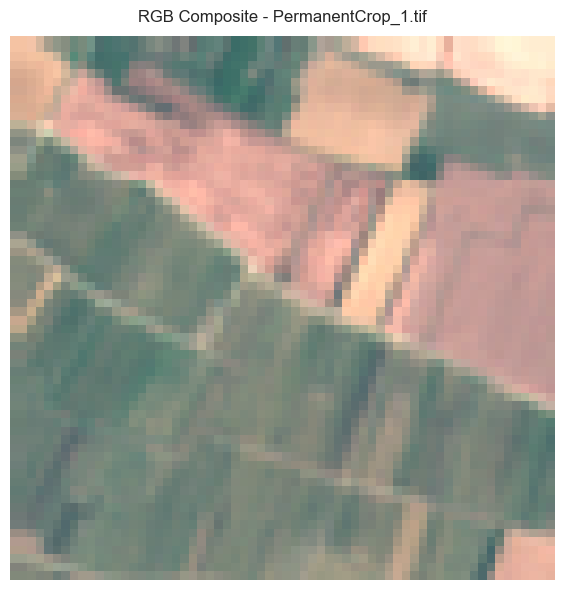

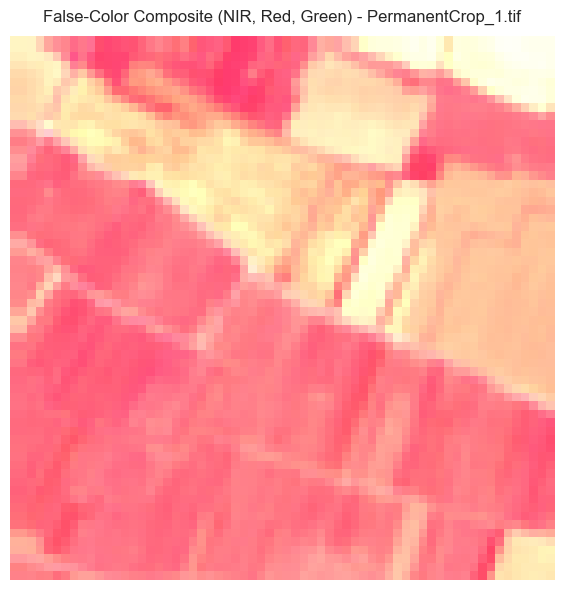


Sample Image Band Statistics:


,Band,Mean,Std,Min,Max
0,B01,1236.563721,67.026321,1153.000000,1536.000000
1,B02,1056.573975,158.681518,785.000000,1707.000000
2,B03,1152.212158,195.730241,785.000000,1944.000000
3,B04,1208.217529,429.712242,464.000000,2675.000000
4,B05,1586.343506,291.794277,1172.000000,2841.000000
5,B06,2481.257080,259.051743,1874.000000,3451.000000
6,B07,2902.629639,332.940511,2129.000000,4174.000000
7,B08,2823.405518,383.210865,2075.000000,4748.000000
8,B09,857.029297,70.985127,713.000000,1103.000000
9,B10,10.612793,0.891021,8.000000,13.000000



🏥 PermanentCrop Health Assessment:
----------------------------------------
🌲 Very Healthy (NDVI > 0.6): 8.9%
🌳 Healthy (0.3–0.6):        59.9%
🌿 Moderate (0.1–0.3):       31.2%
🌱 Sparse (-0.1–0.1):        0.0%
🏔️ Non-Vegetation (< -0.1):  0.0%

🎯 Overall Health Score: 0.724 → Good 🌳
✅ Deep multispectral analysis completed!


In [20]:
import rasterio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set seaborn style for better visuals
sns.set_style("whitegrid")

print("Exploring Sample PermanentCrop Image...")
print("=" * 55)

# Load sample image
if not PermanentCrop_tifs:
    raise FileNotFoundError("No PermanentCrop images found!")
sample_file = PermanentCrop_tifs[0]
print(f"Sample image: {sample_file.name}")

try:
    with rasterio.open(sample_file) as src:
        img = src.read()  # Shape: (bands, height, width)
        profile = src.profile
except Exception as e:
    raise RuntimeError(f"Failed to open {sample_file.name}: {e}")

# Display RGB composite (bands 4, 3, 2)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # B04 (Red), B03 (Green), B02 (Blue)
rgb = np.clip(rgb / 2000, 0, 1)  # Normalize for display
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"RGB Composite - {sample_file.name}", fontsize=12, pad=10)
plt.axis('off')
plt.tight_layout()
plt.show()

# Display False-color composite (bands 8, 4, 3)
false_color = np.stack([img[7], img[3], img[2]], axis=-1)  # B08 (NIR), B04 (Red), B03 (Green)
false_color = np.clip(false_color / 2000, 0, 1)
plt.figure(figsize=(6, 6))
plt.imshow(false_color)
plt.title(f"False-Color Composite (NIR, Red, Green) - {sample_file.name}", fontsize=12, pad=10)
plt.axis('off')
plt.tight_layout()
plt.show()

# Compute basic statistics
stats = []
for b in range(img.shape[0]):
    band = img[b].astype(float)
    stats.append({
        'Band': f'B{b+1:02d}',
        'Mean': np.mean(band),
        'Std': np.std(band),
        'Min': np.min(band),
        'Max': np.max(band)
    })
stats_df = pd.DataFrame(stats)
print("\nSample Image Band Statistics:")
display(stats_df.style.set_caption("Band Statistics for Sample Image").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold')]}
]))

# --- Compute vegetation indices ---
with rasterio.open(sample_file) as src:
    nir = src.read(8).astype(np.float32)
    red = src.read(4).astype(np.float32)
    blue = src.read(2).astype(np.float32)

ndvi = (nir - red) / (nir + red + 1e-6)
evi = 2.5 * ((nir - red) / (nir + 6*red - 7.5*blue + 1))
L = 0.5
savi = ((nir - red) / (nir + red + L)) * (1 + L)

# --- Assess crop health based on NDVI ---
very_healthy = np.sum(ndvi > 0.6) / ndvi.size * 100
healthy = np.sum((ndvi > 0.3) & (ndvi <= 0.6)) / ndvi.size * 100
moderate = np.sum((ndvi > 0.1) & (ndvi <= 0.3)) / ndvi.size * 100
sparse = np.sum((ndvi > -0.1) & (ndvi <= 0.1)) / ndvi.size * 100
non_veg = np.sum(ndvi <= -0.1) / ndvi.size * 100

print("\n🏥 PermanentCrop Health Assessment:")
print("-" * 40)
print(f"🌲 Very Healthy (NDVI > 0.6): {very_healthy:.1f}%")
print(f"🌳 Healthy (0.3–0.6):        {healthy:.1f}%")
print(f"🌿 Moderate (0.1–0.3):       {moderate:.1f}%")
print(f"🌱 Sparse (-0.1–0.1):        {sparse:.1f}%")
print(f"🏔️ Non-Vegetation (< -0.1):  {non_veg:.1f}%")

score = (very_healthy*1.0 + healthy*0.8 + moderate*0.5 + sparse*0.2)/100
status = "Excellent 🌲✨" if score>0.8 else ("Good 🌳" if score>0.6 else ("Moderate 🌿" if score>0.4 else "Poor 🌱"))
print(f"\n🎯 Overall Health Score: {score:.3f} → {status}")
print("✅ Deep multispectral analysis completed!")
print("=" * 50)


## 🔄 Step 4: Comparative Analysis Across Permanent Crop Patches


🔄 Comparing multiple PermanentCrop patches (RGB + NDVI + Histogram)...


C:\Users\tadoa\AppData\Local\Temp\ipykernel_12220\1410595364.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


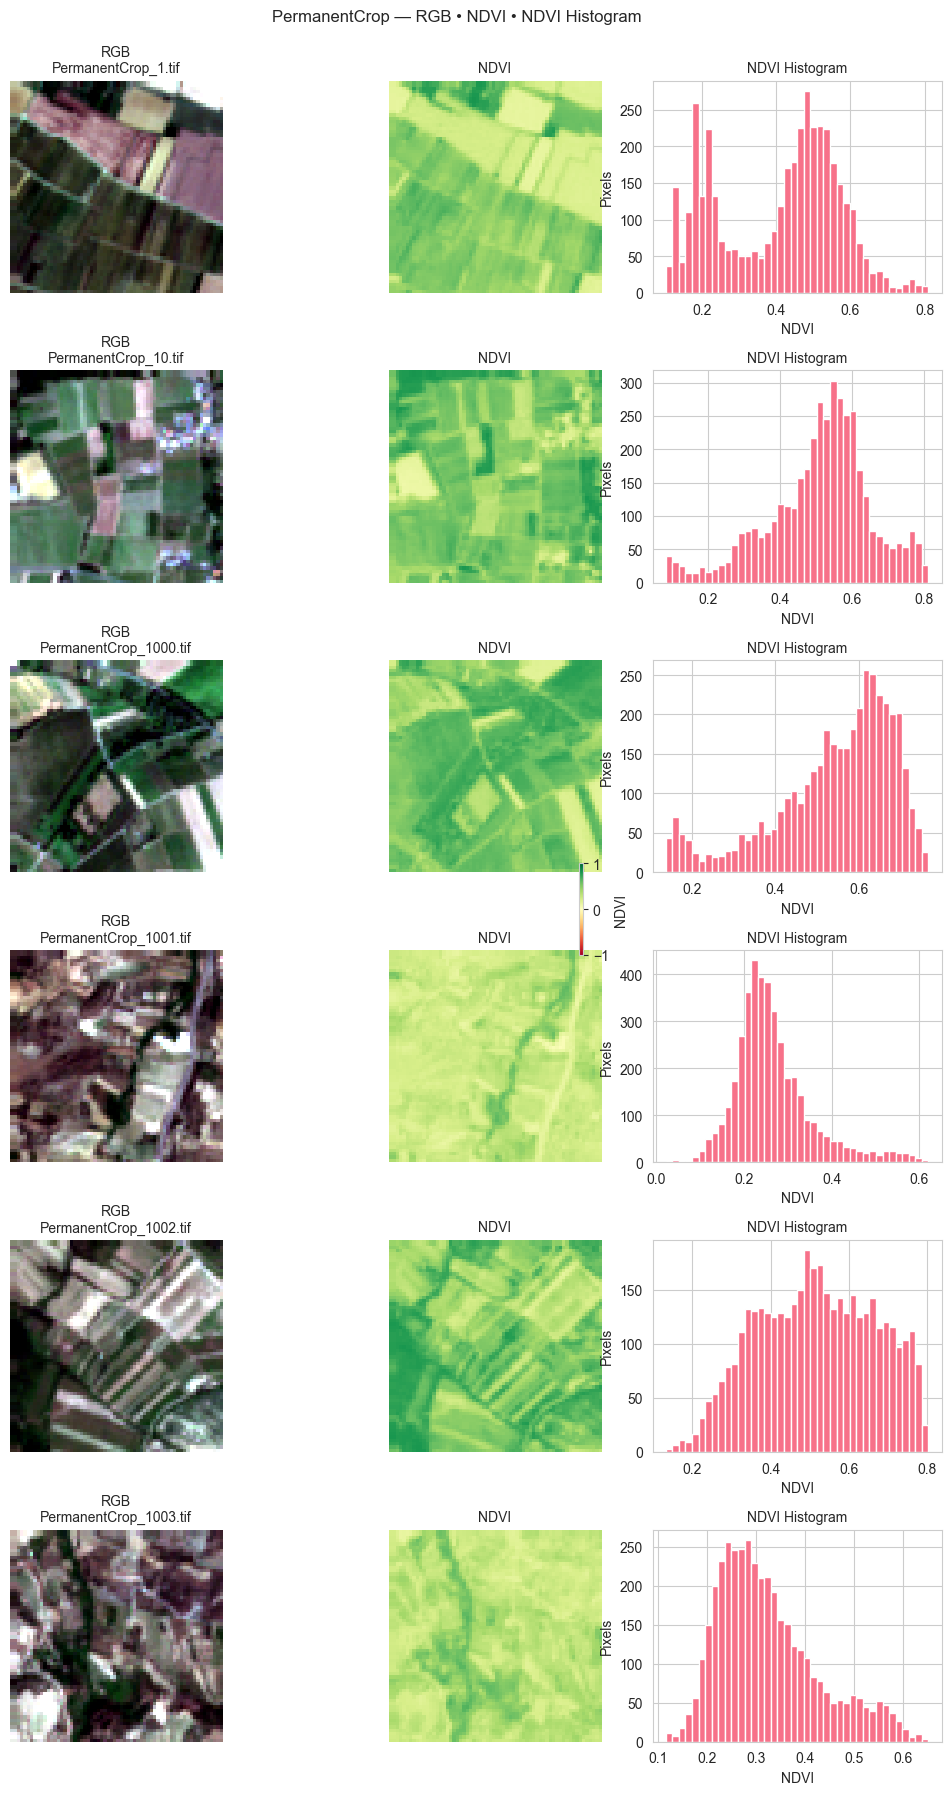

✅ Step 4 done.


In [21]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import time

warnings.filterwarnings('ignore', category=rasterio.errors.NotGeoreferencedWarning)

print(f"🔄 Comparing multiple {CLASS_NAME} patches (RGB + NDVI + Histogram)...")
PermanentCrop_dir = DATA_DIR / CLASS_NAME
files = sorted(PermanentCrop_dir.glob("*.tif"))
if not files:
    raise FileNotFoundError(f"No .tif files found in {PermanentCrop_dir}")

MAX_SAMPLES = min(1000, len(files))
N_THREADS = 4
selected_files = files[:MAX_SAMPLES]

def stretch01(x, p=(2, 98)):
    x = x.astype("float32")
    nonzero = x[x > 0]
    lo, hi = np.percentile(nonzero if nonzero.size else x, p)
    return np.clip((x - lo) / (hi - lo + 1e-6), 0, 1)

def read_bands(path, idxs):
    with rasterio.open(path) as src:
        return [src.read(i).astype("float32") for i in idxs]

N = min(6, len(files))
subset = files[:N]

fig, axes = plt.subplots(N, 3, figsize=(10, 3*N))
if N == 1:
    axes = np.array([axes])

last_im = None
for i, p in enumerate(subset):
    # RGB (Bands 4,3,2)
    r, g, b = read_bands(p, [4, 3, 2])
    rgb = np.dstack([stretch01(r), stretch01(g), stretch01(b)])
    axes[i, 0].imshow(rgb); axes[i, 0].axis("off")
    axes[i, 0].set_title(f"RGB\n{p.name}", fontsize=10)

    # NDVI = (NIR - Red) / (NIR + Red)
    nir, red = read_bands(p, [8, 4])
    ndvi = (nir - red) / (nir + red + 1e-6); ndvi = np.clip(ndvi, -1, 1)
    last_im = axes[i, 1].imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
    axes[i, 1].set_title("NDVI", fontsize=10); axes[i, 1].axis("off")

    # Histogram
    axes[i, 2].hist(ndvi.ravel(), bins=40)
    axes[i, 2].set_title("NDVI Histogram", fontsize=10)
    axes[i, 2].set_xlabel("NDVI"); axes[i, 2].set_ylabel("Pixels")

if last_im is not None:
    cbar = plt.colorbar(last_im, ax=axes[:, 1], fraction=0.02)
    cbar.set_label("NDVI")

plt.suptitle(f"{CLASS_NAME} — RGB • NDVI • NDVI Histogram", y=0.995)
plt.tight_layout(); plt.show()
print("✅ Step 4 done.")


## 📊 Step 5: Large-Scale PermanentCrop Spectral Statistics


📊 Starting Large-Scale PermanentCrop Spectral Analysis...
📁 Analyzing 1,000 PermanentCrop images out of 2,000 available
⚡ Using 4 threads for parallel processing
📏 Image dimensions: 64 × 64 pixels
📊 Spectral bands: 13
  → Processed 100/1000 images...
  → Processed 200/1000 images...
  → Processed 300/1000 images...
  → Processed 400/1000 images...
  → Processed 500/1000 images...
  → Processed 600/1000 images...
  → Processed 700/1000 images...
  → Processed 800/1000 images...
  → Processed 900/1000 images...
  → Processed 1000/1000 images...
⏱️ Finished in 9.3s | Success: 1000 | Errors: 0


,filename,band_1_mean,band_1_std,band_1_min,band_1_max,band_1_median,band_1_p05,band_1_p95,band_1_nonzero_pct,band_2_mean,...,band_12_nonzero_pct,band_13_mean,band_13_std,band_13_min,band_13_max,band_13_median,band_13_p05,band_13_p95,band_13_nonzero_pct,ndvi_mean
0,PermanentCrop_1000.tif,1330.722412,40.855240,1272.0,1500.0,1322.0,1283.00,1414.0,100.0,1074.209473,...,100.0,3314.658691,439.544342,2206.0,4872.0,3267.0,2724.00,4077.00,100.0,0.540735
1,PermanentCrop_1.tif,1236.563721,67.026321,1153.0,1536.0,1214.0,1166.75,1347.0,100.0,1056.573975,...,100.0,3234.666992,371.501617,2467.0,4612.0,3205.0,2672.00,3981.25,100.0,0.408164
2,PermanentCrop_10.tif,1284.785156,43.325829,1172.0,1420.0,1281.0,1220.00,1369.0,100.0,1038.612305,...,100.0,3359.478760,343.088074,1937.0,4455.0,3372.0,2715.00,3963.00,100.0,0.509980
3,PermanentCrop_1001.tif,1648.741943,74.209846,1538.0,1920.0,1641.0,1555.00,1790.0,100.0,1511.624756,...,100.0,3275.839355,434.860870,2262.0,4252.0,3263.0,2608.75,3989.50,100.0,0.265454
4,PermanentCrop_1002.tif,1360.266602,79.034904,1186.0,1529.0,1353.0,1211.00,1497.0,100.0,1143.975098,...,100.0,3863.494141,435.915192,2980.0,5302.0,3783.0,3277.75,4717.25,100.0,0.516502


,band,name,wavelength,resolution,mean_of_means,std_of_means,p05_mean,p95_mean,mean_of_stds,mean_p05,mean_p95,avg_nonzero_pct,n_images
0,B01,B01-Coastal,443nm,60,1414.559891,163.787321,1180.308594,1741.752014,63.228787,1322.59925,1529.12300,100.0,1000
1,B02,B02-Blue,490nm,10,1224.689839,204.948347,927.287219,1650.638074,157.706283,1013.28300,1510.50525,100.0,1000
2,B03,B03-Green,560nm,10,1245.589027,260.280608,887.741541,1758.740161,212.210240,952.46750,1627.48475,100.0,1000
3,B04,B04-Red,665nm,10,1315.247834,404.692636,697.546899,1992.265625,340.293704,825.45425,1922.78750,100.0,1000
4,B05,B05-RedEdge1,705nm,20,1603.447298,367.910638,1035.789551,2217.628638,261.267608,1209.82250,2061.15000,100.0,1000
5,B06,B06-RedEdge2,740nm,20,2451.233841,303.196219,2021.669141,2953.187476,291.525368,1994.65650,2942.31825,100.0,1000
6,B07,B07-RedEdge3,783nm,20,2862.501316,342.213691,2397.708716,3408.332739,353.183410,2307.87125,3455.32525,100.0,1000
7,B08,B08-NIR,842nm,10,2771.074967,332.050022,2298.350940,3290.661682,401.037235,2143.68250,3439.74350,100.0,1000
8,B09,B09-WaterVapor,945nm,60,803.314111,215.383186,484.992212,1268.921118,61.439437,702.44375,904.43175,100.0,1000
9,B10,B10-Cirrus,1375nm,60,13.580130,3.190053,9.677979,19.745911,1.037821,11.93000,15.21825,100.0,1000


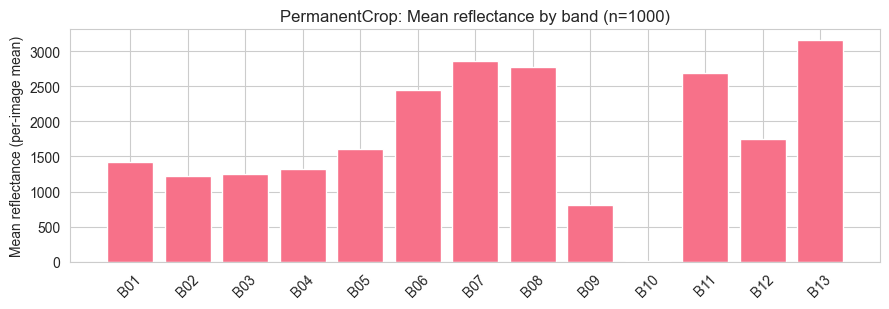

C:\Users\tadoa\AppData\Local\Temp\ipykernel_12220\2916867506.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.figure(figsize=(10, 3.6)); plt.boxplot(data_for_box, labels=[f'B{b:02d}' for b in range(1, band_count+1)], showfliers=False)


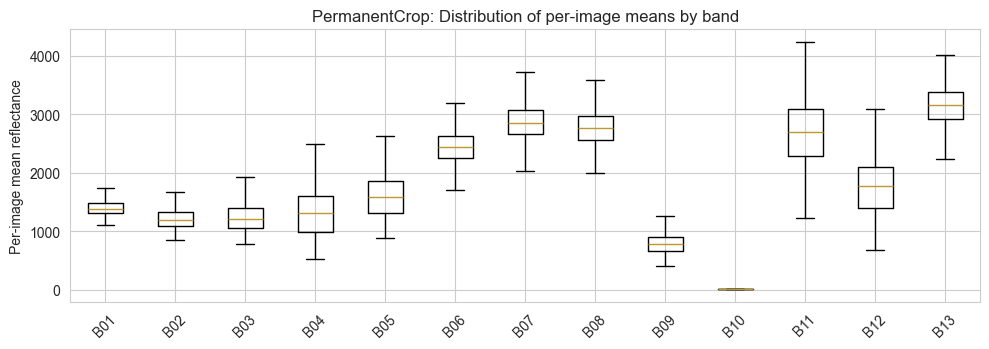

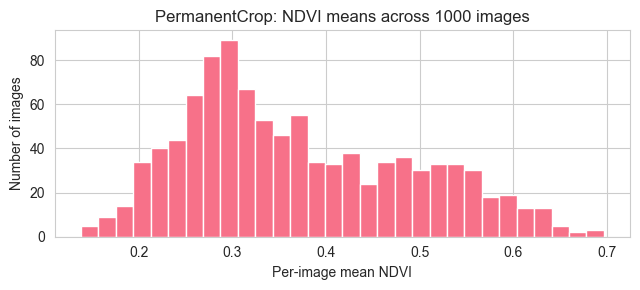


🔎 Takeaways:
- Highest reflectance bands: B13(B8A-NIRNarrow), B07(B07-RedEdge3), B08(B08-NIR), B11(B11-SWIR1), B06(B06-RedEdge2)
- Lowest reflectance (often atmospheric/less useful): B10(B10-Cirrus), B09(B09-WaterVapor), B02(B02-Blue)
✅ Step 5 done.


In [23]:
# ====== STEP 5: Large-Scale Pasture Spectral Statistics ======
import time
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings
import pandas as pd

# Suppress non-critical rasterio warnings
warnings.filterwarnings('ignore', category=rasterio.errors.NotGeoreferencedWarning)

print(f"📊 Starting Large-Scale {CLASS_NAME} Spectral Analysis...")
print("=" * 55)

pasture_dir = DATA_DIR / CLASS_NAME
files = sorted(pasture_dir.glob("*.tif"))
assert len(files) > 0, f"No .tif files found in {pasture_dir}"

# --- Configure analysis parameters ---
MAX_SAMPLES = min(1000, len(files))
N_THREADS   = 4
selected_files = files[:MAX_SAMPLES]
print(f"📁 Analyzing {len(selected_files):,} {CLASS_NAME} images out of {len(files):,} available")
print(f"⚡ Using {N_THREADS} threads for parallel processing")

# --- Get metadata from a single file to use for all images ---
with rasterio.open(selected_files[0]) as src0:
    band_count = src0.count
    sample_height, sample_width = src0.height, src0.width
print(f"📏 Image dimensions: {sample_height} × {sample_width} pixels")
print(f"📊 Spectral bands: {band_count}")

# --- Detailed Sentinel-2 band information ---
SENTINEL2_DETAILED = {
     1: {'name': 'B01-Coastal',    'wavelength': '443nm',  'resolution': 60},
     2: {'name': 'B02-Blue',       'wavelength': '490nm',  'resolution': 10},
     3: {'name': 'B03-Green',      'wavelength': '560nm',  'resolution': 10},
     4: {'name': 'B04-Red',        'wavelength': '665nm',  'resolution': 10},
     5: {'name': 'B05-RedEdge1',   'wavelength': '705nm',  'resolution': 20},
     6: {'name': 'B06-RedEdge2',   'wavelength': '740nm',  'resolution': 20},
     7: {'name': 'B07-RedEdge3',   'wavelength': '783nm',  'resolution': 20},
     8: {'name': 'B08-NIR',        'wavelength': '842nm',  'resolution': 10},
     9: {'name': 'B09-WaterVapor', 'wavelength': '945nm',  'resolution': 60},
    10: {'name': 'B10-Cirrus',     'wavelength': '1375nm', 'resolution': 60},
    11: {'name': 'B11-SWIR1',      'wavelength': '1610nm', 'resolution': 20},
    12: {'name': 'B12-SWIR2',      'wavelength': '2190nm', 'resolution': 20},
    13: {'name': 'B8A-NIRNarrow',  'wavelength': '865nm',  'resolution': 20},
}

# --- Function to compute statistics for a single band array ---
def per_band_stats(arr: np.ndarray):
    x = arr.astype(np.float32)
    valid = x[x > 0]
    if valid.size == 0:
        return {'mean': np.nan, 'std': np.nan, 'min': np.nan, 'max': np.nan,
                'median': np.nan, 'p05': np.nan, 'p95': np.nan, 'nonzero_pct': 0.0}
    return {
        'mean': float(valid.mean()), 'std': float(valid.std()), 'min': float(valid.min()), 'max': float(valid.max()),
        'median': float(np.median(valid)), 'p05': float(np.percentile(valid, 5)), 'p95': float(np.percentile(valid, 95)),
        'nonzero_pct': float(100 * valid.size / x.size)
    }

# --- Worker function to process a single image in parallel ---
def process_single_image(filepath):
    try:
        with rasterio.open(filepath) as src:
            if src.count != band_count:
                return None, f"Band mismatch in {filepath.name}: expected {band_count}, got {src.count}"
            stats = {'filename': filepath.name}
            cache = {}
            for b in range(1, band_count+1):
                arr = src.read(b)
                cache[b] = arr
                s = per_band_stats(arr)
                for k, v in s.items():
                    stats[f'band_{b}_{k}'] = v
            red = cache[4].astype(np.float32); nir = cache[8].astype(np.float32)
            ndvi = (nir - red) / (nir + red + 1e-6); ndvi = np.clip(ndvi, -1, 1)
            stats['ndvi_mean'] = float(np.nanmean(ndvi))
            return stats, None
    except Exception as e:
        return None, f"Error {filepath.name}: {e}"

# --- Main processing loop using a ThreadPoolExecutor for speed ---
results, errors = [], []
t0 = time.time()
with ThreadPoolExecutor(max_workers=N_THREADS) as ex:
    futs = {ex.submit(process_single_image, fp): fp for fp in selected_files}
    for i, fut in enumerate(as_completed(futs), 1):
        res, err = fut.result()
        if res is not None: results.append(res)
        if err is not None: errors.append(err)
        if i % 100 == 0 or i == len(selected_files):
            print(f"  → Processed {i}/{len(selected_files)} images...")
print(f"⏱️ Finished in {time.time()-t0:.1f}s | Success: {len(results)} | Errors: {len(errors)}")
if errors:
    print("\n".join(errors[:3]))

df = pd.DataFrame(results); assert len(df)>0, "No images processed—cannot summarize."
display(df.head())

# --- Create a summary table of band statistics across all images ---
summary_rows = []
for b in range(1, band_count+1):
    m  = df[f'band_{b}_mean'].to_numpy(dtype=float)
    sd = df[f'band_{b}_std'].to_numpy(dtype=float)
    p5 = df[f'band_{b}_p05'].to_numpy(dtype=float)
    p95= df[f'band_{b}_p95'].to_numpy(dtype=float)
    nz = df[f'band_{b}_nonzero_pct'].to_numpy(dtype=float)
    summary_rows.append({
        'band': f'B{b:02d}', 'name': SENTINEL2_DETAILED.get(b, {}).get('name', f'B{b:02d}'),
        'wavelength': SENTINEL2_DETAILED.get(b, {}).get('wavelength', 'N/A'),
        'resolution': SENTINEL2_DETAILED.get(b, {}).get('resolution', 'N/A'),
        'mean_of_means': float(np.nanmean(m)), 'std_of_means': float(np.nanstd(m)),
        'p05_mean': float(np.nanpercentile(m, 5)), 'p95_mean': float(np.nanpercentile(m, 95)),
        'mean_of_stds': float(np.nanmean(sd)), 'mean_p05': float(np.nanmean(p5)), 'mean_p95': float(np.nanmean(p95)),
        'avg_nonzero_pct': float(np.nanmean(nz)), 'n_images': int(len(df))
    })
summary = pd.DataFrame(summary_rows); display(summary)

# --- Visualize mean reflectance and distribution ---
plt.figure(figsize=(9, 3.2))
plt.bar(summary['band'], summary['mean_of_means'])
plt.xticks(rotation=45); plt.ylabel('Mean reflectance (per-image mean)')
plt.title(f"{CLASS_NAME}: Mean reflectance by band (n={len(df)})")
plt.tight_layout(); plt.show()

data_for_box = [df[f'band_{b}_mean'].to_numpy(dtype=float) for b in range(1, band_count+1)]
plt.figure(figsize=(10, 3.6)); plt.boxplot(data_for_box, labels=[f'B{b:02d}' for b in range(1, band_count+1)], showfliers=False)
plt.xticks(rotation=45); plt.ylabel('Per-image mean reflectance')
plt.title(f"{CLASS_NAME}: Distribution of per-image means by band")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6.5, 3)); plt.hist(df['ndvi_mean'].to_numpy(dtype=float), bins=30)
plt.xlabel('Per-image mean NDVI'); plt.ylabel('Number of images')
plt.title(f"{CLASS_NAME}: NDVI means across {len(df)} images")
plt.tight_layout(); plt.show()

# --- Print key takeaways from the analysis ---
top_bands = summary.sort_values('mean_of_means', ascending=False).head(5)[['band','name']]
low_bands = summary.sort_values('mean_of_means', ascending=True).head(3)[['band','name']]
print("\n🔎 Takeaways:")
print("- Highest reflectance bands:", ", ".join([f"{b}({n})" for b,n in top_bands.to_numpy()]))
print("- Lowest reflectance (often atmospheric/less useful):", ", ".join([f"{b}({n})" for b,n in low_bands.to_numpy()]))
print("✅ Step 5 done.")
